## Random Walk with numpy

In [1]:
import numpy as np

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

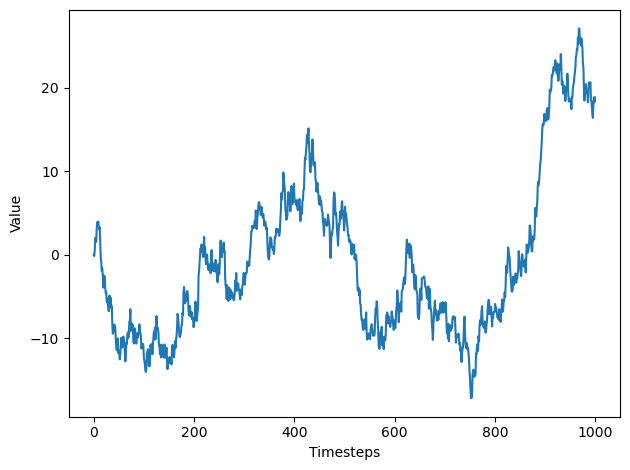

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

In [3]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(random_walk)
print(f"ADF stats: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF stats: -0.965952487691875
p-value: 0.7654789696692581


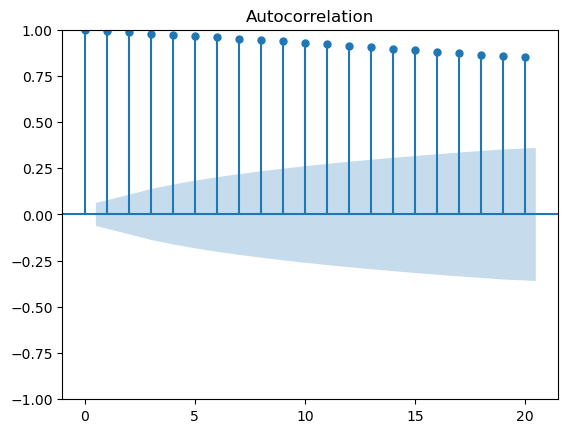

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20);

In [5]:
diff_random_walk = np.diff(random_walk, n=1)

Text(0, 0.5, 'Value')

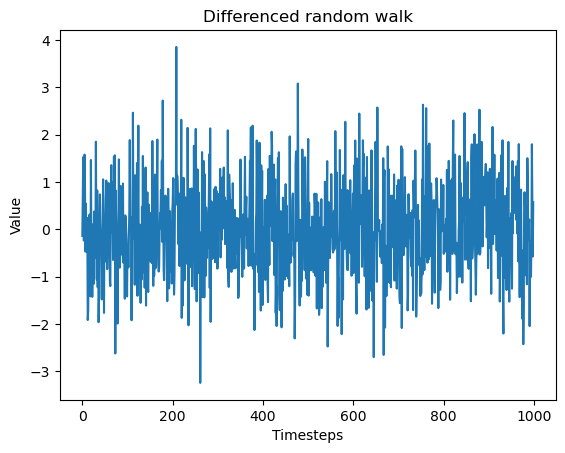

In [6]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_title("Differenced random walk")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")


In [7]:
diff_adf_result = adfuller(diff_random_walk)
print(f"ADF stats: {diff_adf_result[0]}")
print(f"p-value: {diff_adf_result[1]}")

ADF stats: -31.789310857560594
p-value: 0.0


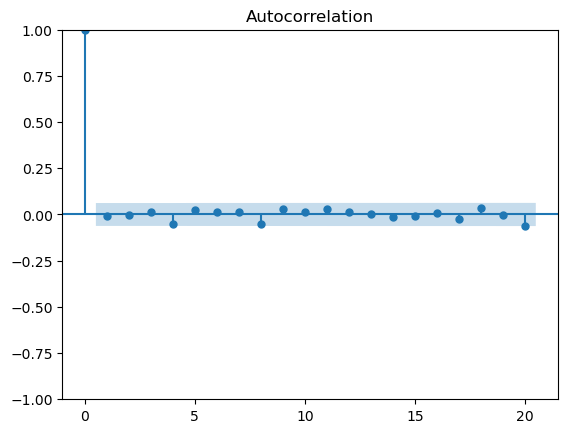

In [8]:
plot_acf(diff_random_walk, lags=20);

## Check GOOGL for random walk

In [9]:
import pandas as pd

df = pd.read_csv("data/GOOGL.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


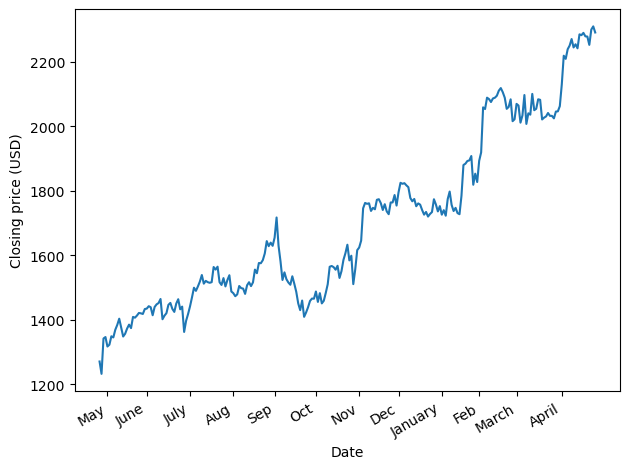

In [10]:
fig, ax = plt.subplots()

ax.plot(df["Date"], df["Close"])
ax.set_xlabel("Date")
ax.set_ylabel("Closing price (USD)")

plt.xticks([4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
           ["May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec", "January", "Feb", "March", "April"])

fig.autofmt_xdate()
plt.tight_layout()

In [11]:
GOOGL_adf_result = adfuller(df["Close"])
print(f"ADF stats: {GOOGL_adf_result[0]}")
print(f"p-value: {GOOGL_adf_result[1]}")

ADF stats: 0.16025048664771302
p-value: 0.9699419435913057


In [12]:
# Make ts stationary

diff_close = np.diff(df["Close"], n=1)

In [13]:
GOOGL_diff_adf_result = adfuller(diff_close)
print(f"ADF stats: {GOOGL_diff_adf_result[0]}")
print(f"p-value: {GOOGL_diff_adf_result[1]}")

ADF stats: -5.303439704295234
p-value: 5.3865309614545585e-06


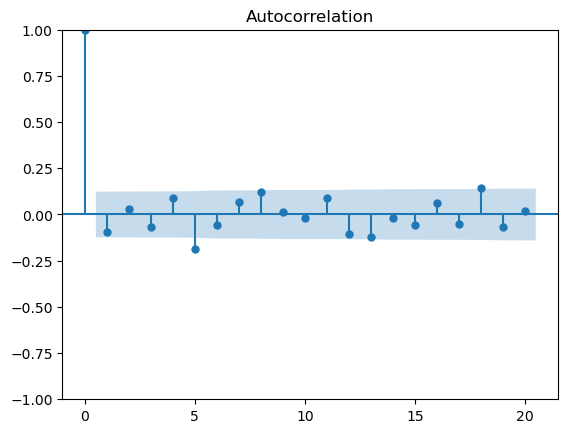

In [14]:
plot_acf(diff_close, lags=20);

## Long horizon forecasting

In [15]:
df = pd.DataFrame({"value": random_walk})

train_data = df[:800]
test_data = df[800:]

In [16]:
mean = np.mean(train_data.value)
test_data.loc[:, "pred_mean"] = mean
test_data.head()

/tmp/ipykernel_5040/4239147744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_mean"] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [17]:
last_value = train_data.iloc[-1].value
test_data.loc[:, "pred_last"] = last_value

test_data.head()

/tmp/ipykernel_5040/1527827236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_last"] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [18]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

drift

-0.008529346056640632

In [19]:
x_vals = np.arange(800, 1000, 1)

pred_drift = drift * x_vals

test_data.loc[:, "pred_drift"] = pred_drift
test_data.head()

/tmp/ipykernel_5040/2029654902.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_drift"] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823477
801,-6.392708,-3.677206,-6.814947,-6.832006
802,-6.296588,-3.677206,-6.814947,-6.840536
803,-6.758863,-3.677206,-6.814947,-6.849065
804,-7.193359,-3.677206,-6.814947,-6.857594


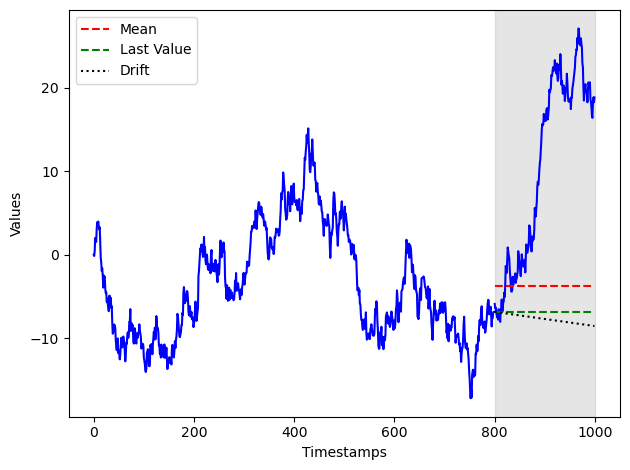

In [20]:
fig, ax = plt.subplots()

ax.plot(train_data.value, "b-")
ax.plot(test_data["value"], "b-")
ax.plot(test_data["pred_mean"], "r--", label="Mean")
ax.plot(test_data["pred_last"], "g--", label="Last Value")
ax.plot(test_data["pred_drift"], "k:", label="Drift")

ax.axvspan(800, 1000, color="#808080", alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel("Timestamps")
ax.set_ylabel("Values")

plt.tight_layout()


In [21]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test_data["value"], test_data["pred_mean"])
mse_last_val = mean_squared_error(test_data["value"], test_data["pred_last"])
mse_drift = mean_squared_error(test_data["value"], test_data["pred_drift"])


In [22]:
print(mse_mean, mse_last_val, mse_drift)

326.50277395297474 425.1726033055617 465.9076036601397


## Forecasting next timestamp

In [23]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


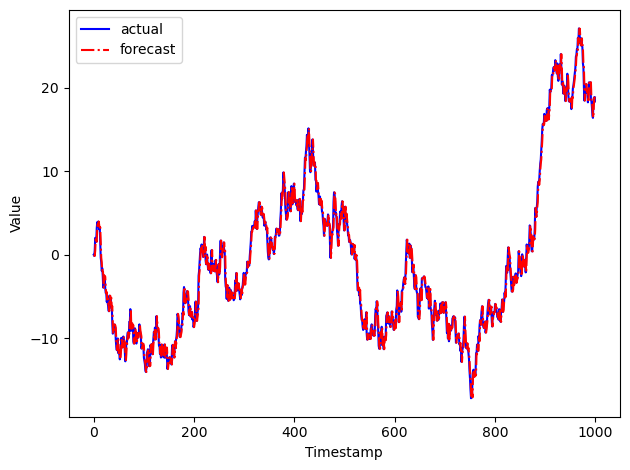

In [24]:
fig, ax = plt.subplots()

ax.plot(df, "b-", label="actual")
ax.plot(df_shift, "r-.", label="forecast")

ax.legend(loc=2)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Value")

plt.tight_layout()

In [25]:
mse_one_step = mean_squared_error(test_data["value"], df_shift[800:])

mse_one_step

0.9256876651440581

# Exercise

## Exercise 1

### Naive random walk forecasting

In [26]:
np.random.seed(11)

new_rand_walk = np.random.standard_normal(500)

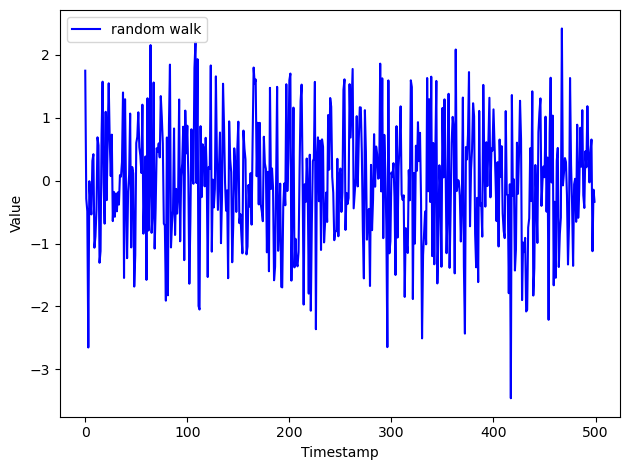

In [27]:
fig, ax = plt.subplots()

ax.plot(new_rand_walk, "b-", label="random walk")

ax.legend(loc=2)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Value")

plt.tight_layout()

In [29]:
new_rand_walk_adf_result = adfuller(new_rand_walk)
print(f"ADF stats: {new_rand_walk_adf_result[0]}")
print(f"p-value: {new_rand_walk_adf_result[1]}")

ADF stats: -22.163356344604924
p-value: 0.0


In [31]:
last_random_val = new_rand_walk[-1]

In [32]:
deltaX = 400 - 1
deltaY = last_random_val - 0

drift = deltaY / deltaX

drift

-0.0008385272602206684

In [39]:
new_random_walk_df = pd.DataFrame({
    "value": new_rand_walk,
})

new_random_walk_df.head()

,value
0,1.749455
1,-0.286073
2,-0.484565
3,-2.653319
4,-0.008285


In [41]:
train_random_walk_data = new_random_walk_df[:400]
test_random_walk_data = new_random_walk_df[400:]

In [43]:
pred_random_mean = np.mean(train_random_walk_data)
x_vals = np.arange(400, 500, 1)
pred_random_drift = drift * x_vals

test_random_walk_data.loc[:, "pred_mean"] = pred_random_mean
test_random_walk_data.loc[:, "pred_last"] = last_random_val
test_random_walk_data.loc[:, "pred_drift"] = pred_random_drift


/tmp/ipykernel_5040/4112382077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_random_walk_data.loc[:, "pred_mean"] = pred_random_mean
/tmp/ipykernel_5040/4112382077.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_random_walk_data.loc[:, "pred_last"] = last_random_val
/tmp/ipykernel_5040/4112382077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

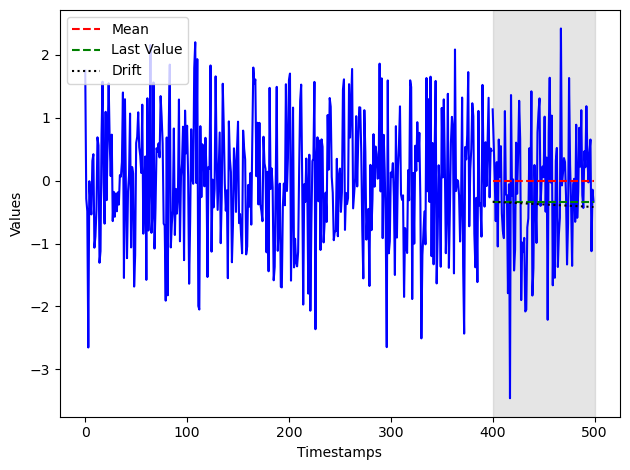

In [44]:
fig, ax = plt.subplots()

ax.plot(train_random_walk_data.values, "b-")
ax.plot(test_random_walk_data["value"], "b-")
ax.plot(test_random_walk_data["pred_mean"], "r--", label="Mean")
ax.plot(test_random_walk_data["pred_last"], "g--", label="Last Value")
ax.plot(test_random_walk_data["pred_drift"], "k:", label="Drift")

ax.axvspan(400, 500, color="#808080", alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel("Timestamps")
ax.set_ylabel("Values")

plt.tight_layout()

In [45]:
mse_mean = mean_squared_error(test_random_walk_data["value"], test_random_walk_data["pred_mean"])
mse_last_val = mean_squared_error(test_random_walk_data["value"], test_random_walk_data["pred_last"])
mse_drift = mean_squared_error(test_random_walk_data["value"], test_random_walk_data["pred_drift"])

print(mse_mean, mse_last_val, mse_drift)

0.9848709936413428 1.007997046559037 1.0336193565509142


### Forecastig one timestamp

In [47]:
df_shift = new_random_walk_df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,1.749455
2,-0.286073
3,-0.484565
4,-2.653319


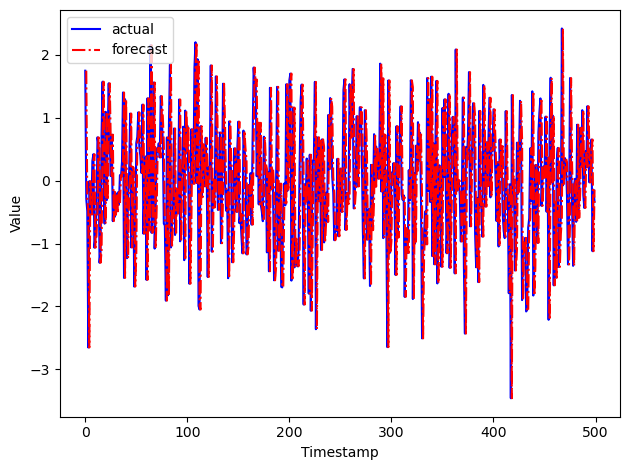

In [48]:
fig, ax = plt.subplots()

ax.plot(new_random_walk_df, "b-", label="actual")
ax.plot(df_shift, "r-.", label="forecast")

ax.legend(loc=2)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Value")

plt.tight_layout()

In [49]:
mse_one_step = mean_squared_error(test_random_walk_data["value"], df_shift[400:])

mse_one_step

1.870514975750078